# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# What is the probability of getting a 1, 2, 3, 4, 5, or 6?

total_outcomes = 6 * 6
probabilities = []

for i in range(1, 7):
    # Count the number of outcomes where the minimum is exactly i
    count = 0
    for d1 in range(1, 7):
        for d2 in range(1, 7):
            if min(d1, d2) == i:
                count += 1

    probability = count / total_outcomes
    probabilities.append(probability)

for i, p in enumerate(probabilities):
    print(f'P(Rmin = {i+1}) = {p:.03f}')

P(Rmin = 1) = 0.306
P(Rmin = 2) = 0.250
P(Rmin = 3) = 0.194
P(Rmin = 4) = 0.139
P(Rmin = 5) = 0.083
P(Rmin = 6) = 0.028


In [3]:
# Which values are more or less likely compared to the roll of a single six-sided die?

for i, p in enumerate(probabilities):
    if p > 1/6:
        print(f'{i+1} is more likely than a single six-sided die')
    elif p == 1/6:
        print(f'{i+1} is equally likely than a single six-sided die')
    else:
        print(f'{i+1} is less likely than a single six-sided die')

1 is more likely than a single six-sided die
2 is more likely than a single six-sided die
3 is more likely than a single six-sided die
4 is less likely than a single six-sided die
5 is less likely than a single six-sided die
6 is less likely than a single six-sided die


In [4]:
# What is the expected value of $R_{min}$? 

expected_value = sum(i * p for i, p in enumerate(probabilities, start=1))
print(f'The expected value of R_min is {expected_value:.3f}')

The expected value of R_min is 2.528


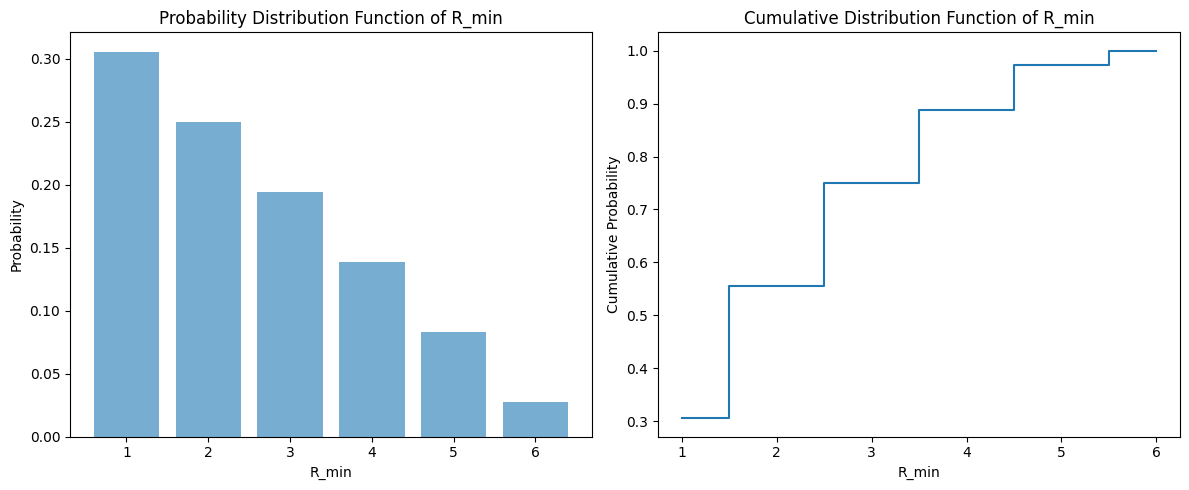

In [5]:
# Plot the probability and cumulative distribution functions for $R_{min}$.

# Values for R_min
values = np.arange(1, 7)

# probability distribution function
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(values, probabilities, alpha=0.6)
plt.xlabel('R_min')
plt.ylabel('Probability')
plt.title('Probability Distribution Function of R_min')

# cumulative distribution function
cdf = np.cumsum(probabilities)
plt.subplot(1, 2, 2)
plt.step(values, cdf, where='mid')
plt.xlabel('R_min')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function of R_min')

plt.tight_layout()
plt.show()

> Compute this by hand and simulate it using the law of large numbers.

1. **Probability of $R_{min} = 1$**: 
   - The probability that at least one die shows 1. It's easier to compute the complement — the probability that both dice show a number greater than 1 — and subtract it from 1:
     $$
     P(R_{min} = 1) = 1 - \left(\frac{5}{6}\right)^2
     $$

2. **Probability of $R_{min} = 2$**: 
   - The probability that both dice are at least 2, but at least one die is exactly 2:
     $$
     P(R_{min} = 2) = \left(\frac{5}{6}\right)^2 - \left(\frac{4}{6}\right)^2
     $$

3. **Similarly for $R_{min} = 3, 4, 5, 6$**: 
   - The pattern continues with subtracting the probability of the next higher minimum from the current:
     $$
     P(R_{min} = 3) = \left(\frac{4}{6}\right)^2 - \left(\frac{3}{6}\right)^2
     $$
     $$
     P(R_{min} = 4) = \left(\frac{3}{6}\right)^2 - \left(\frac{2}{6}\right)^2
     $$
     $$
     P(R_{min} = 5) = \left(\frac{2}{6}\right)^2 - \left(\frac{1}{6}\right)^2
     $$
     $$
     P(R_{min} = 6) = \left(\frac{1}{6}\right)^2
     $$

4. **Expected Value of $R_{min}$**:
   - The expected value is calculated as the sum of each value multiplied by its probability:
     $$
     EV = 1 \times P(R_{min} = 1) + 2 \times P(R_{min} = 2) + 3 \times P(R_{min} = 3) + 4 \times P(R_{min} = 4) + 5 \times P(R_{min} = 5) + 6 \times P(R_{min} = 6)
     $$
   - Substituting the probabilities:
     $$
     EV = 1 \times \left(1 - \left(\frac{5}{6}\right)^2\right) + 2 \times \left(\left(\frac{5}{6}\right)^2 - \left(\frac{4}{6}\right)^2\right) + 3 \times \left(\left(\frac{4}{6}\right)^2 - \left(\frac{3}{6}\right)^2\right) + 4 \times \left(\left(\frac{3}{6}\right)^2 - \left(\frac{2}{6}\right)^2\right) + 5 \times \left(\left(\frac{2}{6}\right)^2 - \left(\frac{1}{6}\right)^2\right) + 6 \times \left(\frac{1}{6}\right)^2
     $$

   - Calculating each term:

- $1 \times \left(1 - \left(\frac{5}{6}\right)^2\right) = 1 \times \left(1 - \frac{25}{36}\right) = \frac{11}{36}$
- $2 \times \left(\left(\frac{5}{6}\right)^2 - \left(\frac{4}{6}\right)^2\right) = 2 \times \left(\frac{25}{36} - \frac{16}{36}\right) = \frac{18}{36}$
- $3 \times \left(\left(\frac{4}{6}\right)^2 - \left(\frac{3}{6}\right)^2\right) = 3 \times \left(\frac{16}{36} - \frac{9}{36}\right) = \frac{21}{36}$
- $4 \times \left(\left(\frac{3}{6}\right)^2 - \left(\frac{2}{6}\right)^2\right) = 4 \times \left(\frac{9}{36} - \frac{4}{36}\right) = \frac{20}{36}$
- $5 \times \left(\left(\frac{2}{6}\right)^2 - \left(\frac{1}{6}\right)^2\right) = 5 \times \left(\frac{4}{36} - \frac{1}{36}\right) = \frac{15}{36}$
- $6 \times \left(\frac{1}{6}\right)^2 = 6 \times \frac{1}{36} = \frac{6}{36}$

Summing these terms:

$$
EV = \frac{11}{36} + \frac{18}{36} + \frac{21}{36} + \frac{20}{36} + \frac{15}{36} + \frac{6}{36} = \frac{91}{36}
$$

Therefore, the expected value of $R_{min}$ is approximately $2.53$.



In [6]:
# Number of simulations
n_simulations = 1000000

# Simulate rolling two dice
rolls = np.random.randint(1, 7, (n_simulations, 2))

# Calculate R_min for each pair of rolls
r_min_simulated = np.min(rolls, axis=1)

# Calculate the expected value (mean) of R_min
expected_value_simulated = np.mean(r_min_simulated)

# Display the simulated expected value
print(f'Simulated Expected Value of R_min is {expected_value_simulated:.3f}')

Simulated Expected Value of R_min is 2.526


# 2

In [7]:
# What is the probability of getting a 1, 2, 3, 4, 5, or 6? 

total_outcomes = 6 * 6 * 6
probabilities = []

for i in range(1, 7):
    # Count the number of outcomes where the minimum is exactly i
    count = 0
    for d1 in range(1, 7):
        for d2 in range(1, 7):
            for d3 in range(1, 7):
                sorted_dice = sorted([d1, d2, d3])
                if sorted_dice[1] == i:  
                    count += 1

    probability = count / total_outcomes
    probabilities.append(probability)

for i, p in enumerate(probabilities):
    print(f'P(Rmin = {i+1}) = {p:.03f}')

P(Rmin = 1) = 0.074
P(Rmin = 2) = 0.185
P(Rmin = 3) = 0.241
P(Rmin = 4) = 0.241
P(Rmin = 5) = 0.185
P(Rmin = 6) = 0.074


In [8]:
# Which values are more or less likely compared to the roll of a single six-sided die?

for i, p in enumerate(probabilities):
    if p > 1/6:
        print(f'{i+1} is more likely than a single six-sided die')
    elif p == 1/6:
        print(f'{i+1} is equally likely than a single six-sided die')
    else:
        print(f'{i+1} is less likely than a single six-sided die')

1 is less likely than a single six-sided die
2 is more likely than a single six-sided die
3 is more likely than a single six-sided die
4 is more likely than a single six-sided die
5 is more likely than a single six-sided die
6 is less likely than a single six-sided die


In [9]:
# What is the expected value of? 

expected_value = sum(i * p for i, p in enumerate(probabilities, start=1))
print(f'The expected value of R_min is {expected_value:.3f}')

The expected value of R_min is 3.500


In [10]:
# Simulation

# Number of simulations
n_simulations = 1000000

# Simulate rolling two dice
rolls = np.random.randint(1, 7, (n_simulations, 3))

# Count R_med
middle_counts = {i: 0 for i in range(1, 7)}

for roll in rolls:
    middle_value = sorted(roll)[1]  # Sort the roll and take the middle value
    middle_counts[middle_value] += 1

for i in range(1, 7):
    probability = middle_counts[i] / n_simulations
    print(f'P(Rmed = {i}) = {probability:.03f}')

P(Rmed = 1) = 0.074
P(Rmed = 2) = 0.185
P(Rmed = 3) = 0.241
P(Rmed = 4) = 0.241
P(Rmed = 5) = 0.186
P(Rmed = 6) = 0.074


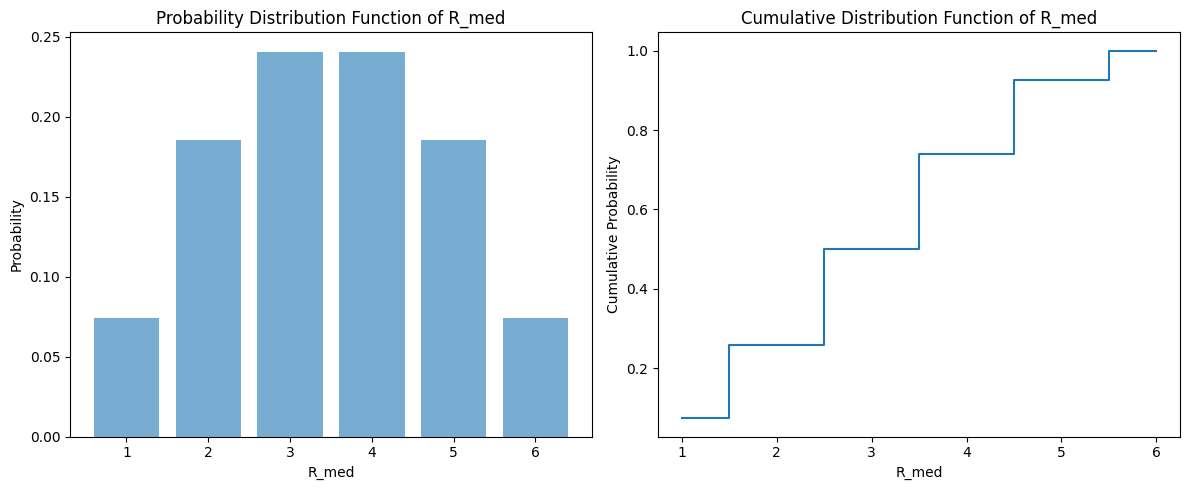

In [11]:
# Plot the probability and cumulative distribution functions for. I recommend using simulations and the law of large numbers.

import matplotlib.pyplot as plt

# Values for R_med
values = np.arange(1, 7)

# probability distribution function
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(values, probabilities, alpha=0.6)
plt.xlabel('R_med')
plt.ylabel('Probability')
plt.title('Probability Distribution Function of R_med')

# cumulative distribution function
cdf = np.cumsum(probabilities)
plt.subplot(1, 2, 2)
plt.step(values, cdf, where='mid')
plt.xlabel('R_med')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function of R_med')

plt.tight_layout()
plt.show()

In [12]:
# 3
# Write code to simulate this process, and determine its expected value using the law of large numbers. 
# What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation?

def roll_dice_until_stop():
    total = 0
    while True:
        roll = np.random.randint(1, 7)
        total += roll
        if roll != 6:
            break
    return total

# Number of simulations
n_simulations = 1000000

# Simulate the process and collect totals
totals = [roll_dice_until_stop() for _ in range(n_simulations)]

expected_value = np.mean(totals)
print(f'Expected Value: {expected_value:.03f}')

total_counts = {i: totals.count(i) for i in range(1, max(totals) + 1)}
for total, count in total_counts.items():
    probability = count / n_simulations
    print(f'P(Total = {total}) = {probability:.03f}')

Expected Value: 4.203
P(Total = 1) = 0.167
P(Total = 2) = 0.166
P(Total = 3) = 0.167
P(Total = 4) = 0.166
P(Total = 5) = 0.166
P(Total = 6) = 0.000
P(Total = 7) = 0.028
P(Total = 8) = 0.028
P(Total = 9) = 0.028
P(Total = 10) = 0.028
P(Total = 11) = 0.028
P(Total = 12) = 0.000
P(Total = 13) = 0.005
P(Total = 14) = 0.004
P(Total = 15) = 0.005
P(Total = 16) = 0.005
P(Total = 17) = 0.005
P(Total = 18) = 0.000
P(Total = 19) = 0.001
P(Total = 20) = 0.001
P(Total = 21) = 0.001
P(Total = 22) = 0.001
P(Total = 23) = 0.001
P(Total = 24) = 0.000
P(Total = 25) = 0.000
P(Total = 26) = 0.000
P(Total = 27) = 0.000
P(Total = 28) = 0.000
P(Total = 29) = 0.000
P(Total = 30) = 0.000
P(Total = 31) = 0.000
P(Total = 32) = 0.000
P(Total = 33) = 0.000
P(Total = 34) = 0.000
P(Total = 35) = 0.000
P(Total = 36) = 0.000
P(Total = 37) = 0.000
P(Total = 38) = 0.000
P(Total = 39) = 0.000
P(Total = 40) = 0.000
P(Total = 41) = 0.000
P(Total = 42) = 0.000
P(Total = 43) = 0.000
P(Total = 44) = 0.000
P(Total = 45) = 0.0

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups. 
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results? 

In [13]:
df = pd.read_csv('./data/mammogram.csv')
df

,treatment,breast_cancer_death
0,mammogram,yes
1,mammogram,yes
2,mammogram,yes
3,mammogram,yes
4,mammogram,yes
...,...,...
89830,control,no
89831,control,no
89832,control,no
89833,control,no


In [14]:
df.loc[df['breast_cancer_death']=='yes', 'yes']=1

pd.crosstab(df['treatment'], df['breast_cancer_death'])

breast_cancer_death,no,yes
treatment,,
control,44405,505
mammogram,44425,500


* The control survival rate is 44405/44910=.989 and the mammogram survival rate is 44425/44925=.989.
* There is no discernable difference in survival rates

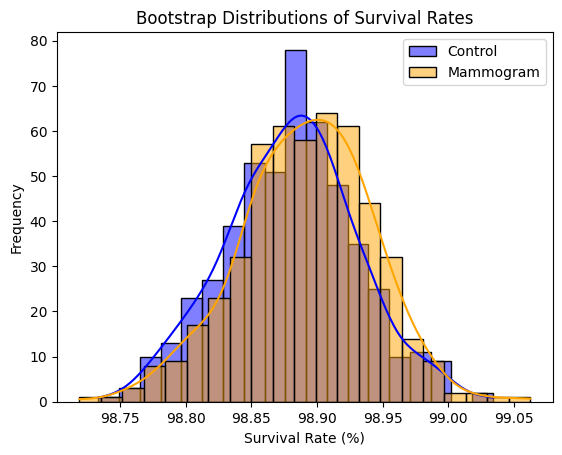

In [15]:
# Bootstrap

n_bootstrap = 500
bootstrap_means_control = []
bootstrap_means_mammogram = []

for _ in range(n_bootstrap):
    # Sampling with replacement
    sample = df.sample(n=len(df), replace=True)

    # Calculating survival rates for each group in this sample
    cross_tab_sample = pd.crosstab(sample['treatment'], sample['breast_cancer_death'])
    survival_rates_sample = cross_tab_sample.apply(lambda x: 100 * (x['no'] / (x['yes'] + x['no'])), axis=1)

    bootstrap_means_control.append(survival_rates_sample['control'])
    bootstrap_means_mammogram.append(survival_rates_sample['mammogram'])

# Plotting the distributions
sns.histplot(bootstrap_means_control, color='blue', label='Control', kde=True)
sns.histplot(bootstrap_means_mammogram, color='orange', label='Mammogram', kde=True)

plt.xlabel('Survival Rate (%)')
plt.ylabel('Frequency')
plt.title('Bootstrap Distributions of Survival Rates')
plt.legend()
plt.show()


In [16]:
# 3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?

# Calculating the difference in bootstrap means for the control and mammogram groups
bootstrap_differences = np.array(bootstrap_means_mammogram) - np.array(bootstrap_means_control)

# Constructing a 99% confidence interval for the difference
CI = np.percentile(bootstrap_differences, [0.5, 99.5])


print(f'The 99% confidence interval for the difference between the two groups is [{CI[0]:.2f}, {CI[1]:.2f}].')

print((CI[0] <= 0) and (CI[1] >= 0))

The 99% confidence interval for the difference between the two groups is [-0.18, 0.18].
True


This does include 0

### 3

Based on the given data, there is no statistically significant difference between the Mammogram and Control groups. 

Since the dataset only provides a binary outcome (yes or no), it limits our ability to understand the effectiveness of mammograms. The bootstrap method assumes the sample is representative of the population, which might not be the case.

There could be many other factors we could track to understand things better, such as the following:
- patient demographics
- health history
- cancer-specific details
- treatment details
- when the death occurred
- quality of life

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant$\times$age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Add the intercept and the transplanttreatment coefficients together from part 3. What do you get? Does that make sense? What are you missing in predicting survival probability this way?
5. Plot the predicted survival probability by age for people who receive a heart transplant and those who don't. Describe what you see.
6. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?

**Q5.** This question refers to `mn_police_use_of_force.csv`. This includes reports on the Minnesota police department's use of force from 1/1/2016 to 8/31/2021. This is, perhaps, a potentially controversial set of data to look at, but I imagine many students sincerely want to think about the difficult questions that society grapples with, what kind of evidence exists, and how they might analyze it using tools from class. We should also always be skeptical of data, particularly when the source has an interest in controlling our beliefs and can define or omit data to advance its interests.

The data include:
- `response_datetime`: DateTime of police response.
- `problem`: Problem that required police response.
- `is_911_call`: Whether response was iniated by call to 911.
- `primary_offense`: Offense of subject.
- `subject_injury`: Whether subject was injured Yes/No/null.
- `force_type`: Type of police force used.
- `force_type_action`: Detail of police force used.
- `race`: Race of subject.
- `sex`: Gender of subject.
- `age`: Age of subject.
- `type_resistance`: Resistance to police by subject.
- `precinct`: Precinct where response occurred.
- `neighborhood`: Neighborhood where response occurred.

To answer the following questions, you need to make choices about what to focus on and how to conduct the analysis. Explain your choices and defend them where appropriate.

1. Are there significant missing values? In what variables? In particular, consider `subject_injury`. Clearly discuss what you find.
2. Cross tabulate `race` and `force_type`. What patterns do you notice? Use the options `normalize='columns'` and `normalize='rows'`, and `margins=True` to explore different ways of normalizing the data to better understand results by race.
3. Use tables, crosstabulation and the bootstrap to investigate the extent to which `force_type` varies between different races.
4. Use tables, crosstabulation and the bootstrap to investigate the extent to which `Maximal Restraint Technique` varies between different races.
5. Use tables, crosstabulation and the bootstrap to investigate the extent to which `subject_injury` varies between different races. Please be clear about how you address the large number of NaN's (you might even use the other data to look at what predicts a NaN in this column to see if there are systematic patterns).
6. Summarize your findings.